In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
import matplotlib.pyplot as plt
import numpy as np
import os

temp = sorted([1.5,1.0,0.9,0.8,0.7,0.65,0.6,0.55,0.5,0.475])

folder_equil = 'Data/equil/'
folder_prod = 'Data/prod/'

filelist_equil = sorted([filename for filename in os.listdir(folder_equil) if os.path.splitext(filename)[1] == '.lammpstrj'],key=lambda x: float(x.split('_T')[1].split('_')[0]))[:-1]
filelist_prod = sorted([filename for filename in os.listdir(folder_prod) if os.path.splitext(filename)[1] == '.dcd'],key=lambda x: float(x.split('_T')[1].split('_')[0]))

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


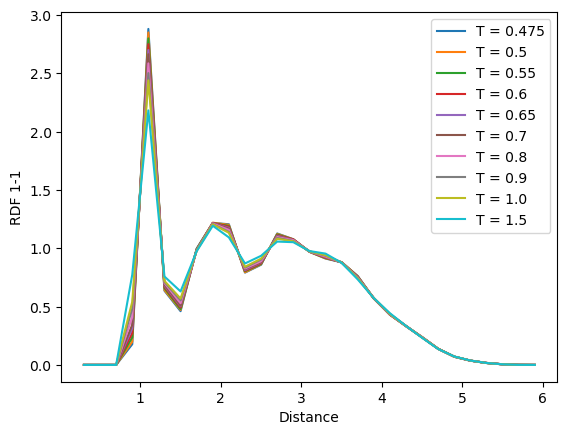

In [72]:
plt.figure()

for i in range(len(filelist_equil)):

    temp_i = temp[i]
    
    u = mda.Universe("Data/equil/"+filelist_equil[i],"Data/prod/"+filelist_prod[i], topology_format="LAMMPSDUMP")

    ag_1 = u.atoms.select_atoms('type 1')
    ag_2 = u.atoms.select_atoms('type 2')

    rdf_1_1 = rdf.InterRDF(ag_1, ag_1)
    rdf_1_1.run()


    plt.plot(rdf_1_1.results.bins[1:30],rdf_1_1.results.rdf[1:30],'-',label='T = '+str(temp_i),ms=5)


plt.xlabel('Distance')
plt.ylabel('RDF 1-1')
#plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/RDF_1_1.jpg')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


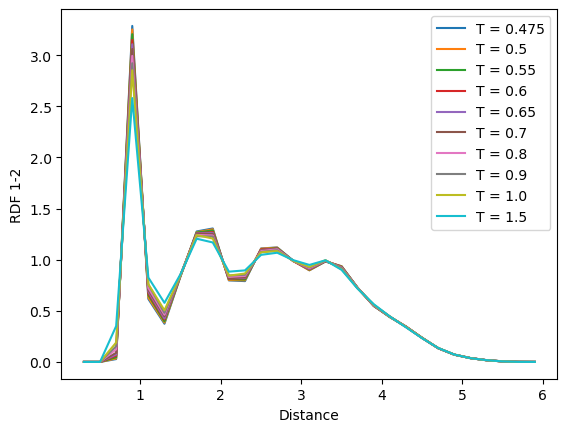

In [73]:
plt.figure()

for i in range(len(filelist_equil)):

    temp_i = temp[i]
    
    u = mda.Universe("Data/equil/"+filelist_equil[i],"Data/prod/"+filelist_prod[i], topology_format="LAMMPSDUMP")

    ag_1 = u.atoms.select_atoms('type 1')
    ag_2 = u.atoms.select_atoms('type 2')

    rdf_1_2 = rdf.InterRDF(ag_1, ag_2)
    rdf_1_2.run()


    plt.plot(rdf_1_2.results.bins[1:30],rdf_1_2.results.rdf[1:30],'-',label='T = '+str(temp_i),ms=5)


plt.xlabel('Distance')
plt.ylabel('RDF 1-2')
#plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/RDF_1_2.jpg')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


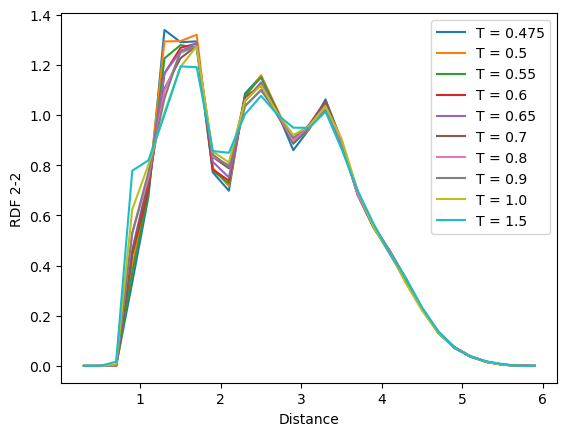

In [74]:
plt.figure()

for i in range(len(filelist_equil)):

    temp_i = temp[i]
    
    u = mda.Universe("Data/equil/"+filelist_equil[i],"Data/prod/"+filelist_prod[i], topology_format="LAMMPSDUMP")

    ag_1 = u.atoms.select_atoms('type 1')
    ag_2 = u.atoms.select_atoms('type 2')

    rdf_2_2 = rdf.InterRDF(ag_2, ag_2)
    rdf_2_2.run()


    plt.plot(rdf_2_2.results.bins[1:30],rdf_2_2.results.rdf[1:30],'-',label='T = '+str(temp_i),ms=5)


plt.xlabel('Distance')
plt.ylabel('RDF 2-2')
#plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/RDF_2_2.jpg')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


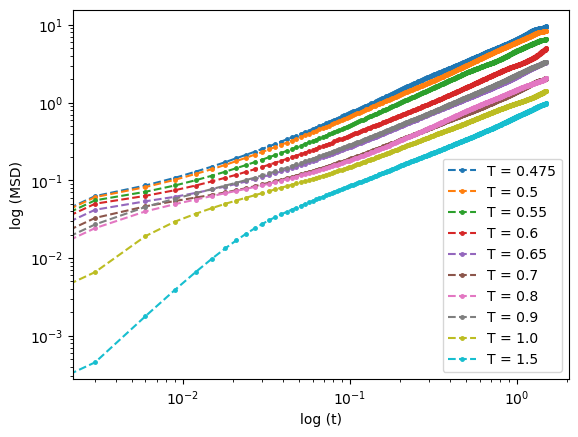

In [2]:
plt.figure()

MSD_equal_1 = []

for i in range(len(filelist_equil)):

    temp_i = temp[i]
    
    u = mda.Universe("Data/equil/"+filelist_equil[i],"Data/prod/"+filelist_prod[i], topology_format="LAMMPSDUMP")

    MSD_type_1 = msd.EinsteinMSD(u, select="type 1", msd_type='xyz', fft=True)
    MSD_type_1.run()

    msd_timeseries_type_1 = MSD_type_1.results.timeseries

    nframes = MSD_type_1.n_frames
    timestep = 0.003 # specific time units 
    lagtimes = np.arange(nframes)*timestep # make the lag-time axis

    plt.plot(lagtimes,msd_timeseries_type_1,'--.',label='T = '+str(temp_i),ms=5)

    index = (np.abs(msd_timeseries_type_1 - 1)).argmin()
    MSD_equal_1.append(lagtimes[index])


plt.xlabel('log (t)')
plt.ylabel('log (MSD)')
plt.yscale('log')
plt.xscale('log')
#plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/MSD_type_1.jpg')

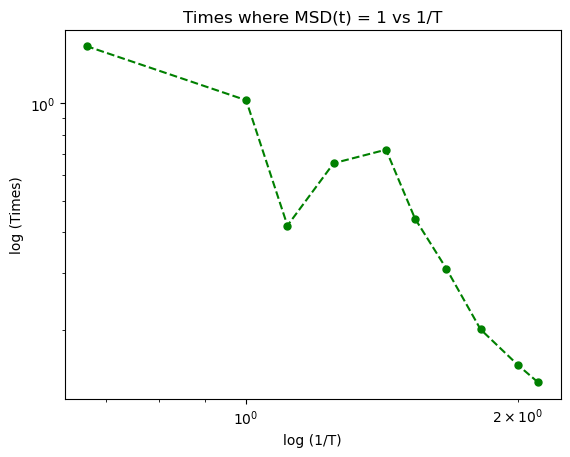

In [12]:
plt.figure()

temp = np.array(temp)

plt.loglog(1/temp,MSD_equal_1,'--g.',ms=10)
#plt.plot(1/temp,MSD_equal_1,'--g.',ms=10)

# labels = temp
# x = 1/temp
# y = MSD_equal_1
# for i, label in enumerate(labels):
#     plt.text(x[i], y[i]+np.log(1.1), label, fontsize=9)#, ha='center',va='bottom')

plt.xlabel('log (1/T)')
plt.ylabel('log (Times)')
#plt.yscale('log')
#plt.xscale('log')
plt.title('Times where MSD(t) = 1 vs 1/T')
# plt.xticks(np.log(1/temp))
#plt.ylim([0,5])
#plt.legend()

plt.savefig('Figures/MSD_1_vs_reciprocal_of_T')